In [11]:
import sys
sys.path.append('../')

import os

import pandas as pd
import numpy as np
import seaborn as sns
import openpyxl
from sklearn.metrics import r2_score

import edd_utils as eddu

In [12]:
# !pip install pympl

# %matplotlib widget

import matplotlib.pyplot as plt


In [13]:
from art.core import *
import art.utility as utils

# import art.plot as plot

### User parameters

In [14]:
CYCLES = [1, 2.1, 3.1, 4.2, 5.1, 6.1]
CYCLE = 'FINAL'
user_params = {
    'output_file_path': f'../flaviolin data/DBTL{CYCLE}', # Folder for output files,
    'bounds_file': f'../flaviolin data/Putida_media_bounds_extended.csv',
    'study_slug_1': 'combinatorial-media-for-flaviolin-repeats-dbt-507a', #DBTL1
    'study_slug_2': 'combinatorial-media-for-flaviolin-repeats-dbtl-21',#DBTL2
    'study_slug_3': 'combinatorial-media-for-flaviolin-repeats-dbt-59a2',#DBTL3
    'study_slug_4': 'combinatorial-media-for-flaviolin-repeats-dbt-46f3',#DBTL4
    'study_slug_5': 'combinatorial-media-for-flaviolin-repeats-dbtl-51',#DBTL5
    'study_slug_6': 'combinatorial-media-for-flaviolin-repeats-dbtl-61',#DBTL6
    'edd_server': 'edd.jbei.org',
    'username': 'azournas',
    } 

In [15]:
study_slug_1 = user_params['study_slug_1']
study_slug_2 = user_params['study_slug_2']
study_slug_3 = user_params['study_slug_3']
study_slug_4 = user_params['study_slug_4']
study_slug_5 = user_params['study_slug_5']
study_slug_6 = user_params['study_slug_6']


edd_server = user_params['edd_server']
username = user_params['username']

## Load the study

In [16]:
try:
  session = eddu.login(edd_server=edd_server, user=username)
except:
  print('ERROR! Connection to EDD failed. We will try to load data from disk...')
else:
  print('OK! Connection to EDD successful. We will try to load data from EDD...')

Password for azournas:  ········


OK! Connection to EDD successful. We will try to load data from EDD...


In [17]:
try:
    df_1 = eddu.export_study(session, study_slug_1, edd_server=edd_server)
    df_2 = eddu.export_study(session, study_slug_2, edd_server=edd_server)
    df_3 = eddu.export_study(session, study_slug_3, edd_server=edd_server)
    df_4 = eddu.export_study(session, study_slug_4, edd_server=edd_server)
    df_5 = eddu.export_study(session, study_slug_5, edd_server=edd_server)
    df_6 = eddu.export_study(session, study_slug_6, edd_server=edd_server)
    load_from_disk = False
except (NameError, AttributeError, KeyError):
    print(f'ERROR! Not able to export the study.')
    load_from_disk = True

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/94 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

  0%|          | 0/96 [00:00<?, ?it/s]

In [18]:
outliers = ['C1_WB8_C2-R1','C2.1_WA7_B1-R1','C2.1_WB8_C2-R1','C2.1_WF6_F8-R2','C3.1_WA5_C5-R3',
           'C5.1_WD1_F1-R1', 'C5.1_WD1_F1-R2', 'C5.1_WD1_F1-R2',  'C5.1_WD3_F3-R2',  'C5.1_WD5_F5-R2',]


In [19]:
def find_col1(series):
    # print(series['Line Name'])
    col = int(series['Line Name'][5]) + int(series['Line Name'][-1])-1
    return col
    
def find_row1(series):
    
    row = series['Line Name'][4]
    if series['Column'] > 8:
        row = chr(ord(row)+1)
    return row
# find_row = lambda x: x['Line Name'][4]

def correct_col1(series):
    col = series['Column']
    if series['Column'] >8:
        col = col-8
        
    return col


def find_col2(x):
    col = int(x['Line Name'][7]) + int(x['Line Name'][-1]) -1
    if col > 8:
        col = col-8
    return col

def find_row2(x):
    if int(x['Line Name'][7]) < 7:
        return x['Line Name'][6]
    elif int(x['Line Name'][7]) == 7:
        if int(x['Line Name'][-1]) == 3:
            return x['Line Name'][9]
        else:
            return x['Line Name'][6]
    elif int(x['Line Name'][7]) == 8:
        if int(x['Line Name'][-1]) in [2,3]:
            return x['Line Name'][9]
        else:
            return x['Line Name'][6]
    else: 
        print(x['Line Name'], int(x['Line Name'][7]), int(x['Line Name'][-1]), x['Line Name'][9]) 


find_col3_6 = lambda x: x['Line Name'][7]

def find_row3_6(row):
    line_name = row['Line Name']
    if line_name[6] == 'A':
        if int(line_name[-1]) == 1:
            return "A"
        elif int(line_name[-1]) == 2:
            return "B"
        else:
            return "C"
    else:
        if int(line_name[-1]) == 1:
            return "D"
        elif int(line_name[-1]) == 2:
            return "E"
        else:
            return "F"



In [20]:
df_1['Column'] =  df_1.apply(find_col1, axis=1)
df_1['Row'] =  df_1.apply(find_row1, axis=1)
df_1['Column'] =  df_1.apply(correct_col1, axis=1)

In [21]:
df_2['Column'] =  df_2.apply(find_col2, axis=1)
df_2['Row'] =  df_2.apply(find_row2, axis=1)


In [22]:
df_3['Column'] =  df_3.apply(find_col3_6, axis=1)
df_3['Row'] =  df_3.apply(find_row3_6, axis=1)

df_4['Column'] =  df_4.apply(find_col3_6, axis=1)
df_4['Row'] =  df_4.apply(find_row3_6, axis=1)

df_5['Column'] =  df_5.apply(find_col3_6, axis=1)
df_5['Row'] =  df_5.apply(find_row3_6, axis=1)

df_6['Column'] =  df_6.apply(find_col3_6, axis=1)
df_6['Row'] =  df_6.apply(find_row3_6, axis=1)


In [23]:
df_1['cycle'] = 1
df_2['cycle'] = 2
df_3['cycle'] = 3
df_4['cycle'] = 4
df_5['cycle'] = 5
df_6['cycle'] = 6


In [91]:
df_5 = df_5[df_5['Protocol'] == 'OD340']

In [184]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

df = df.reset_index()

In [185]:
df.head(48)

,index,Study ID,Study Name,Line ID,Replicate Key,Line Name,Line Description,Protocol,Assay ID,Assay Name,Formal Type,Measurement Type,Compartment,Units,Value,Hours,Column,Row,cycle
0,0,198207,Combinatorial media for flaviolin repeats DBTL 1,198208,3d6e41f8-1e53-4e5e-9d0c-bd05f54610d1,C1_WA1_A3-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198256,C1_WA1_A3-R1,NaN,OD340,0,NaN,0.2076,48.0,1,A,1
1,1,198207,Combinatorial media for flaviolin repeats DBTL 1,198209,933f7301-9067-4487-bf8f-b1c866d6230c,C1_WA1_A3-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198257,C1_WA1_A3-R2,NaN,OD340,0,NaN,0.2149,48.0,2,A,1
2,2,198207,Combinatorial media for flaviolin repeats DBTL 1,198210,f380d449-2b06-4931-bfbd-6b9521a2082c,C1_WA1_A3-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198258,C1_WA1_A3-R3,NaN,OD340,0,NaN,0.2124,48.0,3,A,1
3,3,198207,Combinatorial media for flaviolin repeats DBTL 1,198211,23f9153e-42f9-478b-a8b7-99ea3056ad3c,C1_WA4_A6-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198259,C1_WA4_A6-R1,NaN,OD340,0,NaN,0.1955,48.0,4,A,1
4,4,198207,Combinatorial media for flaviolin repeats DBTL 1,198212,a1e39a42-d040-4003-a6b0-0399da9acb3f,C1_WA4_A6-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198260,C1_WA4_A6-R2,NaN,OD340,0,NaN,0.1859,48.0,5,A,1
5,5,198207,Combinatorial media for flaviolin repeats DBTL 1,198213,f0c8b6cb-571b-472e-be47-24c1e55e552f,C1_WA4_A6-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198261,C1_WA4_A6-R3,NaN,OD340,0,NaN,0.1859,48.0,6,A,1
6,6,198207,Combinatorial media for flaviolin repeats DBTL 1,198214,f77bab33-c64e-4302-b10d-dc228de163de,C1_WA7_B1-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198262,C1_WA7_B1-R1,NaN,OD340,0,NaN,0.1986,48.0,7,A,1
7,7,198207,Combinatorial media for flaviolin repeats DBTL 1,198215,49157e35-221d-4652-8aa9-309d514dce30,C1_WA7_B1-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198263,C1_WA7_B1-R2,NaN,OD340,0,NaN,0.2294,48.0,8,A,1
8,8,198207,Combinatorial media for flaviolin repeats DBTL 1,198216,e8875c75-a18a-4cc1-ae39-feaf1bd936e3,C1_WA7_B1-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198264,C1_WA7_B1-R3,NaN,OD340,0,NaN,0.1602,48.0,1,B,1
9,9,198207,Combinatorial media for flaviolin repeats DBTL 1,198217,83949df4-5a7d-457f-9d2c-e0efbaa9f809,C1_WB2_B4-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",Optical Density,198265,C1_WB2_B4-R1,NaN,OD340,0,NaN,0.3320,48.0,2,B,1


In [186]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6])

df = df.reset_index()

In [187]:
df = df.drop(df.loc[df['Line Name'].isin(outliers)].index)
df = df.reset_index()

Drop unnecessary columns:

In [188]:
df = df.loc[:,['Line Name','Line Description','Measurement Type','Value']]
df = df.loc[df['Measurement Type'] == 'OD340']
df.head()


,Line Name,Line Description,Measurement Type,Value
0,C1_WA1_A3-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2076
1,C1_WA1_A3-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2149
2,C1_WA1_A3-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.2124
3,C1_WA4_A6-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1955
4,C1_WA4_A6-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",OD340,0.1859


In [189]:
df[df['Line Name'].isin(df['Line Name'][df['Line Name'].duplicated()])].head(48)

,Line Name,Line Description,Measurement Type,Value


In [190]:
df[df['Line Name'].isin(df['Line Name'][df['Line Name'].duplicated()])].tail(48)

,Line Name,Line Description,Measurement Type,Value


In [191]:
df['Line Name'].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
461    False
462    False
463    False
464    False
465    False
Name: Line Name, Length: 279, dtype: bool

In [192]:
df[df['Line Name']=='C5.1_WA1_C1-R1']['Line Description']

374    MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...
Name: Line Description, dtype: object

In [193]:
df = df.pivot(index=["Line Name", "Line Description"], columns="Measurement Type", values="Value")
df.reset_index(inplace=True)

In [194]:
df

Measurement Type,Line Name,Line Description,OD340
0,C1_WA1_A3-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2076
1,C1_WA1_A3-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2149
2,C1_WA1_A3-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2124
3,C1_WA4_A6-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.1955
4,C1_WA4_A6-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.1859
...,...,...,...
274,C6.1_WD7_F7-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.5023
275,C6.1_WD7_F7-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.5524
276,C6.1_WD8_F8-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2446
277,C6.1_WD8_F8-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2542


In [195]:
df['Line Description'][0]

'MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3BO3[mM]: 0.019871, Glucose[mM]: 20.000000, K2SO4[mM]: 0.205718, K2HPO4[mM]: 2.365080, FeSO4[mM]: 0.021243, NH4Cl[mM]: 6.375749, MgCl2[mM]: 4.320423, NaCl[mM]: 21.652901, (NH4)6Mo7O24[mM]: 0.000023, CoCl2[mM]: 0.001306, CuSO4[mM]: 0.000100, MnSO4[mM]: 0.000800, ZnSO4[mM]: 0.000100, Kan[g/l]: 0.050000'

In [196]:
import re

components = re.split(': |, ', df['Line Description'][0])[::2]
for comp in components:
    df[comp] = None
    

df

Measurement Type,Line Name,Line Description,OD340,MOPS[mM],Tricine[mM],H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],Kan[g/l]
0,C1_WA1_A3-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2076,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,C1_WA1_A3-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2149,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,C1_WA1_A3-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2124,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,C1_WA4_A6-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.1955,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,C1_WA4_A6-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.1859,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,C6.1_WD7_F7-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.5023,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
275,C6.1_WD7_F7-R3,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.5524,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
276,C6.1_WD8_F8-R1,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2446,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
277,C6.1_WD8_F8-R2,"MOPS[mM]: 40.000000, Tricine[mM]: 4.000000, H3...",0.2542,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [197]:

for i in range(len(df)):
    values = re.split(': |, ', df['Line Description'][i])[1::2]
    # print(i)
    # print(values)
    # print(df.iloc[i,:])
    for c, value in enumerate(values):
        # print(df.iloc[i, (4+c)] )
        df.iloc[i, (3+c)] = float(value)


df.drop(columns='Line Description', inplace=True)

In [198]:
df

Measurement Type,Line Name,OD340,MOPS[mM],Tricine[mM],H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],Kan[g/l]
0,C1_WA1_A3-R1,0.2076,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05
1,C1_WA1_A3-R2,0.2149,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05
2,C1_WA1_A3-R3,0.2124,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05
3,C1_WA4_A6-R1,0.1955,40.0,4.0,0.003918,20.0,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.05
4,C1_WA4_A6-R2,0.1859,40.0,4.0,0.003918,20.0,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,C6.1_WD7_F7-R2,0.5023,40.0,4.0,0.021704,20.0,0.815438,1.224373,0.062374,15.425222,0.095381,505.309732,0.000261,0.002122,0.001375,0.001587,0.00019,0.05
275,C6.1_WD7_F7-R3,0.5524,40.0,4.0,0.021704,20.0,0.815438,1.224373,0.062374,15.425222,0.095381,505.309732,0.000261,0.002122,0.001375,0.001587,0.00019,0.05
276,C6.1_WD8_F8-R1,0.2446,40.0,4.0,0.004174,20.0,0.304902,1.283908,0.010501,8.980715,0.476417,47.053347,0.000033,0.00033,0.000096,0.000784,0.000092,0.05
277,C6.1_WD8_F8-R2,0.2542,40.0,4.0,0.004174,20.0,0.304902,1.283908,0.010501,8.980715,0.476417,47.053347,0.000033,0.00033,0.000096,0.000784,0.000092,0.05


In [232]:
stats

,Condition,mean_OD340,std_OD340,CV_OD340,NaCl
0,C4.2_WD1_F1,0.000470,0.000446,94.842081,719.688474
1,C4.2_WA1_C1,0.003537,0.003706,104.801658,651.233703
2,C6.1_WD1_F1,0.048400,0.003418,7.061160,662.711936
3,C4.2_WA2_C2,0.050200,0.022360,44.542741,782.078648
4,C6.1_WA1_C1,0.065033,0.004438,6.823758,662.711937
...,...,...,...,...,...
91,C1_WB8_C2,0.602150,0.016334,2.712641,392.187867
92,C5.1_WA7_C7,0.609733,0.054729,8.975861,405.639898
93,C5.1_WD4_F4,0.656400,0.019542,2.977110,454.40883
94,C5.1_WD3_F3,0.722250,0.006859,0.949662,493.688987


In [123]:
def get_cond(S):
    return S['Line Name'][:-3]

df['condition'] = df.apply(get_cond, axis=1)

In [124]:
def get_cycle(S):
    return S['Line Name'][1]

    # idx = S['Line Name'].index('_')
    # cycle = S[1:idx]
    # return cycle


In [125]:
import copy

In [126]:
df_exp = copy.deepcopy(df)
df_exp['cycle'] = df_exp.apply(get_cycle, axis=1)
df_exp.head()


Measurement Type,Line Name,OD340,MOPS[mM],Tricine[mM],H3BO3[mM],Glucose[mM],K2SO4[mM],K2HPO4[mM],FeSO4[mM],NH4Cl[mM],MgCl2[mM],NaCl[mM],(NH4)6Mo7O24[mM],CoCl2[mM],CuSO4[mM],MnSO4[mM],ZnSO4[mM],Kan[g/l],condition,cycle
0,C1_WA1_A3-R1,0.2076,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05,C1_WA1_A3,1
1,C1_WA1_A3-R2,0.2149,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05,C1_WA1_A3,1
2,C1_WA1_A3-R3,0.2124,40.0,4.0,0.019871,20.0,0.205718,2.36508,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001,0.05,C1_WA1_A3,1
3,C1_WA4_A6-R1,0.1955,40.0,4.0,0.003918,20.0,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.05,C1_WA4_A6,1
4,C1_WA4_A6-R2,0.1859,40.0,4.0,0.003918,20.0,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001,0.05,C1_WA4_A6,1


In [127]:

user_params = {
    'bounds_file': f'../flaviolin data/Putida_media_bounds_extended_nocacl2.csv',
    'output_dir': f'../flaviolin data/DBTL{CYCLE}', # Folder for output files,
}

user_params['components'] = [
    'H3BO3[mM]',
    #'Glucose[mM]',
    'K2SO4[mM]',
    'K2HPO4[mM]',
    'FeSO4[mM]',
    'NH4Cl[mM]',
    'MgCl2[mM]',
    'NaCl[mM]',
    '(NH4)6Mo7O24[mM]',
    'CoCl2[mM]',
    'CuSO4[mM]',
    'MnSO4[mM]',
    'ZnSO4[mM]',
    # 'CaCl2[mM]'    
]

user_params['response'] = 'OD340' #this will be the parameter we will maximize


Here we specify how many instances (designs) we want to create and how many replicates:

In [128]:
user_params['n_instances_explor'] = 2 # number of exploration recommendations
user_params['n_instances_exploit'] = 13 # number of exploitation recommendations
user_params['n_replicates'] = 3 # number of replicates generated in the biolector plate.
user_params['seed'] = 42
#The biolector plate we are using here is a 48-well plate. For 3 replicates, the total number of conditions tested will need to be 48/3 = 16. In this case 13 exploitation, 2 exploration and 1 standard. 

Lastly we specify the exploration and exploitation parameters (alpha) and the number of iterations that Parallel tempering will go through

In [129]:
user_params['alpha_explor'] = 1
user_params['alpha_exploit'] = 0 
user_params['n_iter'] = 1e5

In [130]:
user_params['scale_input_vars'] = False
user_params['cross_val'] = True
user_params['recommend'] = False
user_params['cross_val_partitions'] = 3


In [ ]:
def train_art(df, user_params,art_filename):
    art_params = {
    'input_vars': user_params['components'],
    'response_vars': [user_params['response']],
    'bounds': utils.read_table(user_params['bounds_file']), # file with bounds# input variables, i.e. features
    'scale_input_vars': user_params['scale_input_vars'],
    'cross_val': user_params['cross_val'],
    'recommend': user_params['recommend'],
    'output_dir': user_params['output_dir'],  # directory to store this output
    'verbose': 1,
    'num_tpot_models': 4,
    'max_mcmc_cores': 4,
    'seed': user_params['seed'],
    'build_model' : True,
    'recommend' : False,
    'cross_val_partitions' : user_params['cross_val_partitions']
    }
    
    art_params['bounds'] = art_params['bounds'].drop(index=[0,1,3])
    
    art = RecommendationEngine(df=df, **art_params)
    
    art.save()
    
    orig_file_name = f"{art_params['output_dir']}/art.cpkl"
    new_file_name = f"{art_params['output_dir']}/{art_filename}"
    os.rename(orig_file_name, new_file_name)

    return art

In [ ]:
df_stacked = df.set_index('Line Name').stack().reset_index()
df_stacked.columns = ['Line Name', 'Measurement Type', 'Value']

### OD340 of the highest performing strains is at 0.7. 
### I multiply the data by 1000 to bring it up to ~700 to improve parallel tempering performance
# df_stacked.loc[df_stacked["Measurement Type"] == "OD340", 'Value'] = df_stacked.loc[df_stacked["Measurement Type"] == "OD340", 'Value'] 

df_stacked

In [131]:
# art = train_art(df_stacked, user_params, 'art_trained_on_DBTL1_to_6.cpkl')
import cloudpickle
fname = f'../flaviolin data/DBTLFINAL/art_trained_on_DBTL1_to_6.cpkl'
with open(fname, "rb") as f:
    art = cloudpickle.load(f)
    

In [132]:
def f(X):
    return art.predict(X)


In [144]:
user_params['components'] = [
    '$H_3BO_3[mM]$',
    #'Glucose[mM]',
    '$K_2SO_4[mM]$',
    '$K_2HPO_4[mM]$',
    '$FeSO_4[mM]$',
    '$NH_4Cl[mM]$',
    '$MgCl_2[mM]$',
    '$NaCl$[mM]',
    '$(NH_4)_6Mo_7O_{24}[mM]$',
    '$CoCl_2[mM]$',
    '$CuSO_4[mM]$',
    '$MnSO_4[mM]$',
    '$ZnSO_4[mM]$',
    # 'CaCl2[mM]'    
]

In [145]:
X_df = pd.DataFrame(data=art.X, columns=user_params['components'])


In [146]:
X_df.head()

,$H_3BO_3[mM]$,$K_2SO_4[mM]$,$K_2HPO_4[mM]$,$FeSO_4[mM]$,$NH_4Cl[mM]$,$MgCl_2[mM]$,$NaCl$[mM],$(NH_4)_6Mo_7O_{24}[mM]$,$CoCl_2[mM]$,$CuSO_4[mM]$,$MnSO_4[mM]$,$ZnSO_4[mM]$
0,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001
1,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001
2,0.019871,0.205718,2.365080,0.021243,6.375749,4.320423,21.652901,0.000023,0.001306,0.0001,0.0008,0.0001
3,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001
4,0.003918,1.883663,0.799089,0.009532,8.860595,3.425574,15.010088,0.000102,0.000255,0.0001,0.0008,0.0001


In [147]:
import shap

In [148]:
explainer_e = shap.Explainer(f, X_df)
shap_values_e = explainer_e(X_df)

PermutationExplainer explainer: 280it [08:50,  1.93s/it]                         


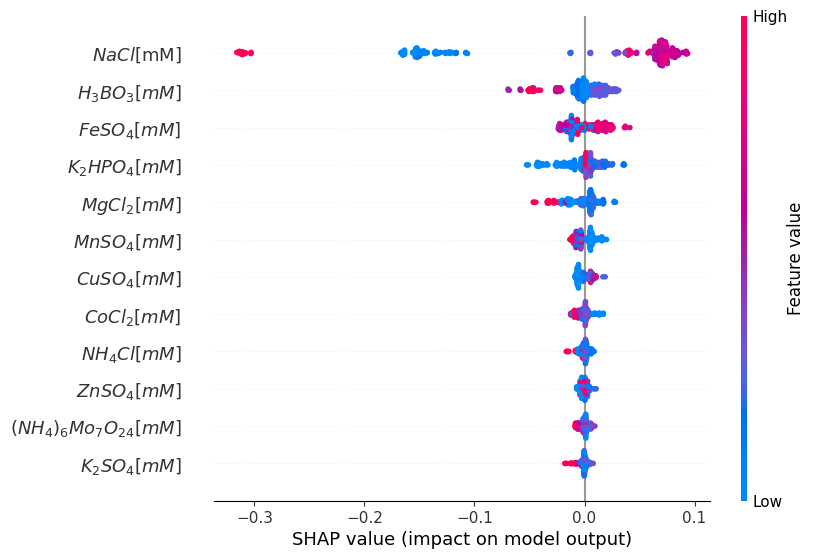

In [149]:
fig = plt.figure(figsize=(9,4.5))
shap.plots.beeswarm(shap_values_e, max_display=20)